In [1]:
from environment import Environment
from bfs_solver import bfs_pathfind
from astar_solver import astar_pathfind
from bibfs_solver import bibfs_pathfind

from tqdm import tqdm

In [2]:
experiment_stats = []
sim_count = 1000

for i in range(4, 9):
    completed = 0
    attempts, rejects = 0, 0
    debris_ratio = i * 0.05
    
    lengths_bfs = 0
    lengths_astar = 0
    lengths_bibfs = 0
    
    visits_bfs = 0
    visits_astar = 0
    visits_bibfs = 0
    
    pbar = tqdm(total=sim_count, desc=f'debris ratio {debris_ratio}')
    
    while completed < sim_count:
        env = Environment(100, debris_ratio=debris_ratio)
        attempts += 1

        # breadth first search
        path, stats = bfs_pathfind(env)
        if path is None: # debris blocking path
            rejects += 1
            continue
        lengths_bfs += stats['path_length']
        visits_bfs +=stats['nodes_visited']

        path, stats = astar_pathfind(env)
        lengths_astar += stats['path_length']
        visits_astar += stats['nodes_visited']

        path, stats = bibfs_pathfind(env)
        lengths_bibfs += stats['path_length']
        visits_bibfs += stats['nodes_visited']
        
        completed += 1
        pbar.update(1)

    pbar.close()
    experiment_stats.append({
        'bfs':{
            'path_lengths':lengths_bfs / sim_count,
            'visit_counts':visits_bfs / sim_count
        },
        'astar':{
            'path_lengths':lengths_astar / sim_count,
            'visit_counts':visits_astar / sim_count
        },
        'bibfs':{
            'path_lengths':lengths_bibfs / sim_count,
            'visits_bibfs':visits_bibfs / sim_count
        },
        'reject_ratio':0 if rejects == 0 else rejects / attempts
    })

debris ratio 0.4: 100%|████████████████████████████████████| 1000/1000 [02:00<00:00,  8.29it/s]


In [4]:
import matplotlib.pyplot as plt

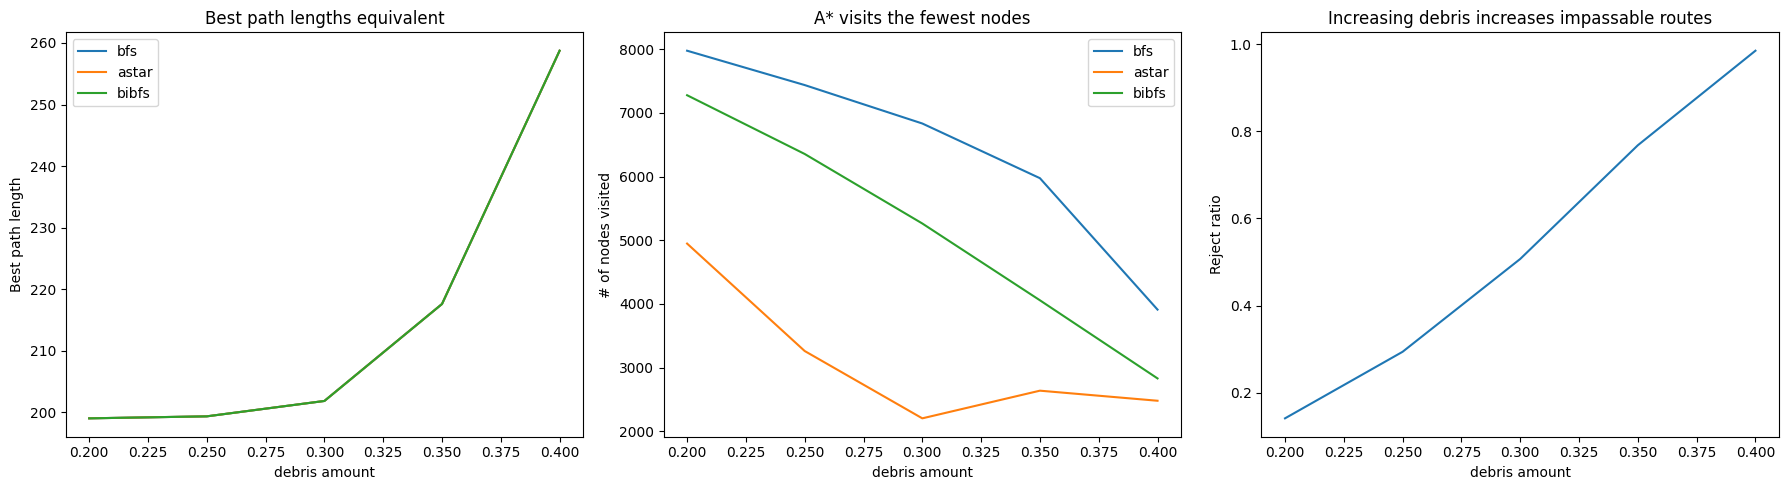

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
xs = [x*0.05 for x in range(4, 9)]

# path lengths
axes[0].plot(xs, [stats['bfs']['path_lengths'] for stats in experiment_stats], label='bfs')
axes[0].plot(xs, [stats['astar']['path_lengths'] for stats in experiment_stats], label='astar')
axes[0].plot(xs, [stats['bibfs']['path_lengths'] for stats in experiment_stats], label='bibfs')
axes[0].set_xlabel('debris amount')
axes[0].set_ylabel('Best path length')
axes[0].set_title('Best path lengths equivalent')
axes[0].legend()

# visit counts
axes[1].plot(xs, [stats['bfs']['visit_counts'] for stats in experiment_stats], label='bfs')
axes[1].plot(xs, [stats['astar']['visit_counts'] for stats in experiment_stats], label='astar')
axes[1].plot(xs, [stats['bibfs']['visits_bibfs'] for stats in experiment_stats], label='bibfs')
axes[1].set_xlabel('debris amount')
axes[1].set_ylabel('# of nodes visited')
axes[1].set_title('A* visits the fewest nodes')
axes[1].legend()

# reject ratio
axes[2].plot(xs, [stats['reject_ratio'] for stats in experiment_stats])
axes[2].set_xlabel('debris amount')
axes[2].set_ylabel('Reject ratio')
axes[2].set_title('Increasing debris increases impassable routes')

plt.tight_layout()
plt.show()

In [6]:
len(experiment_stats)

5